In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
dfCopy = df.copy()

# Tiền xử lý dữ liệu

Trong notebook Diabetes_Exploring.ipynb, phần ma trận tương quan, không có mối quan hệ nào trên 0.8, việc thêm thuộc tính hay kết hợp thuộc tính sẽ không cần thiết vì số lượng giá trị thiếu quá nhiều lẫn việc nhiều ngoại lai, dữ liệu sẽ bị phá nếu kết hợp thuộc tính, thêm thuộc tính thì không ảnh hưởng đáng kể, vậy nên sẽ không có kỹ thuật đặc trưng (feature engineering).

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Kiểm tra giá trị trùng lặp

In [ ]:
duplicated_rows = df[df.duplicated()]
print("Các hàng trùng lặp:")
print(duplicated_rows)
# Xóa các hàng trùng
df = df.drop_duplicates()

Các hàng trùng lặp:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Không có dữ liệu trùng lặp.

## Biến giá trị 0 và âm thành NaN

Dựa vào nguồn gốc của tập dữ liệu này, càng chắc chắn hơn là từ Bệnh Viện Quốc gia về Bệnh tiểu đường, Tiêu hóa và Thận
Bệnh tật (National Institute of Diabetes and Digestive and Kidney
Diseases), lĩnh vực y tế, các số liệu 0 hay giá trị âm được xem là giá trị thiếu, do lỗi nhập thông tin hoặc không điền. Vậy nên, sẽ chuyển chúng thành NaN để dễ xử lý.

Chuyển các giá trị 0 hoặc âm thành giá trị NaN

In [ ]:
features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','Age']
for feature in features:
    df[feature] = df[feature].apply(lambda x: np.nan if x <= 0 else x)

In [ ]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numerical_features].isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


## Chia dữ liệu

Trước khi tiếp tục xử lý dữ liệu, xây dựng và huấn luyện mô hình thì nên chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test). Để tránh rủi ro bị rò rỉ dữ liệu (data leakage)

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print(train.shape,test.shape)

(614, 9) (154, 9)


In [ ]:
train[numerical_features].isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,24
SkinThickness,176
Insulin,290
BMI,7
DiabetesPedigreeFunction,0
Age,0


In [ ]:
test[numerical_features].isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,11
SkinThickness,51
Insulin,84
BMI,4
DiabetesPedigreeFunction,0
Age,0


## Xử lý giá trị bị thiếu

Cách để xử lý các dữ liệu này là sử dụng phương pháp điền giá trị (Imputation) để vá hết các giá trị thiếu của tập dữ liệu. Điều này là cần thiết để giúp cho mô hình học hỏi hiệu quả mà không bị phức tạp hóa hay nhiễu dữ liệu với những tập dữ liệu không có đủ thông tin rõ ràng.

In [ ]:
train_1 = train[train['Outcome']==1]
train_0 = train[train['Outcome']==0]

# Use train set to calculate median
median_1 = train_1[numerical_features].median()
median_0 = train_0[numerical_features].median()

# Fill train set by applying median from train calculation
train.loc[train['Outcome']==1, numerical_features] = train.loc[train['Outcome']==1, numerical_features].fillna(median_1)
train.loc[train['Outcome']==0, numerical_features] = train.loc[train['Outcome']==0, numerical_features].fillna(median_0)

# Fill test set by applying median from train calculation
test.loc[test['Outcome']==1, numerical_features] = test.loc[test['Outcome']==1, numerical_features].fillna(median_1)
test.loc[test['Outcome']==0, numerical_features] = test.loc[test['Outcome']==0, numerical_features].fillna(median_0)

for feature in numerical_features:
  train[feature] = train[feature].astype(dfCopy[feature].dtype)
  test[feature] = test[feature].astype(dfCopy[feature].dtype)

Giá trị để điền là giá trị trung vị (Median), khi đối mặt với tập dữ liệu không được cung cấp đầy đủ thông tin quan trọng như Glucose, Insulin, có sự chênh lệch quá mức sự giữa số liệu thực tế, thì điền giá trị bằng trung vị (Median Imputation) được xem là một cách hợp lí với tập dữ liệu này. Trung vị là giá trị ở giữa của một tập dữ liệu được sắp xếp, nên nó không bị ảnh hưởng bởi các giá trị cực đoan, khiến nó trở thành lựa chọn tốt cho dữ liệu bị lệch.

Median sẽ được tính ở tập train, sau đó áp dụng giá trị đó đồng thời lên tập test, rồi cố định lại kiểu dữ liệu của từng đặc trưng.

In [ ]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,70,26,105,30.0,0.304,21,0
618,9,112,82,24,167,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,26,105,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,26,105,22.4,0.207,27,0
270,10,101,86,37,167,45.6,1.136,38,1
435,0,141,74,32,167,42.4,0.205,29,1


In [ ]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,105,35.7,0.148,21,0
624,2,108,64,26,105,30.8,0.158,21,0
690,8,107,80,26,105,24.6,0.856,34,0
473,7,136,90,26,105,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
355,9,165,88,32,167,30.4,0.302,49,1
534,1,77,56,30,56,33.3,1.251,24,0
344,8,95,72,26,105,36.8,0.485,57,0
296,2,146,70,38,360,28.0,0.337,29,1


## Xử lý giá trị ngoại lai

Giá trị ngoại lai là dữ liệu khác biệt đáng kể so với các quan sát khác trong một tập dữ liệu. Có thể xảy ra do sự thay đổi trong dữ liệu hoặc lỗi đo lường dẫn đến sự chênh lệch quá mức với số liệu thực tế, chúng có tác động lớn đến các phép đo thống kê, như đánh giá trung bình và ảnh hưởng đến hiệu suất mô hình, đặc biệt là trong các thuật toán nhạy cảm như RandomForest, Logistic Regression, Super Vector Machine, KNN.

Để khắc phục vấn đề này, có thể giữ, thay đổi hoặc loại bỏ giá trị ngoại lai tùy vào độ ảnh hưởng lên hiệu suất của mô hình. Sau đây là code loại bỏ giá trị ngoại lai theo từng hàng.

In [ ]:
def remove_outliers(train, test):
    for feature in numerical_features:
        Q1 = train[feature].quantile(0.25)
        Q3 = train[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train = train.loc[(train[feature] >= lower_bound) & (train[feature] <= upper_bound)]
        test = test.loc[(test[feature] >= lower_bound) & (test[feature] <= upper_bound)]

    return train, test

train, test = remove_outliers(train, test)

Trong tập dữ liệu này vì gặp phải quá nhiều số liệu bị lỗi đo lường chênh lệch so với số liệu thực tế nên chọn việc loại bỏ chúng để tránh gây bất ổn, làm giảm hiệu suất của mô hình. Giữ chúng lại có thể sẽ khiến cho dữ liệu bị phức tạp hóa, mô hình không thể học và tiếp thu được, chỉnh sửa chúng lại càng không nên vì điều đấy sẽ khiến dữ liệu có thể sẽ không thực tế và điều này nên được hạn chế.

Việc xử lý giá trị ngoại lai cần được lưu ý ở hiệu suất của mô hình để đảm bảo hiệu quả. Nếu việc xử lý chúng giúp tăng độ hiệu suất, thì nên xử lý, ngược lại thì không cần thiết.

In [ ]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,70,26,105,30.0,0.304,21,0
346,1,139,46,19,83,28.7,0.654,22,0
340,1,130,70,13,105,25.9,0.472,22,0
535,4,132,74,32,167,32.9,0.302,23,1
306,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
700,2,122,76,27,200,35.9,0.483,26,0
71,5,139,64,35,140,28.6,0.411,26,0
270,10,101,86,37,167,45.6,1.136,38,1
435,0,141,74,32,167,42.4,0.205,29,1


In [ ]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,105,35.7,0.148,21,0
624,2,108,64,26,105,30.8,0.158,21,0
690,8,107,80,26,105,24.6,0.856,34,0
473,7,136,90,26,105,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
133,8,84,74,31,105,38.3,0.457,39,0
725,4,112,78,40,105,39.4,0.236,38,0
355,9,165,88,32,167,30.4,0.302,49,1
344,8,95,72,26,105,36.8,0.485,57,0


## Cân bằng dữ liệu

In [ ]:
((train['Outcome']==1).sum()/train.shape[0])*100

31.67701863354037

In [ ]:
((train['Outcome']==0).sum()/train.shape[0])*100

68.32298136645963

In [ ]:
train.shape[0]

483

Như đã thấy ở trên, class 0 có số lượng gấp đôi class 1, cho thấy sự mất cân bằng giữa 2 class trong tập dữ liệu.

Để khắc phục vấn đề này, có thể sử dụng các phương pháp cân bằng dữ liệu như SMOTE (Synthetic Minority Over-sampling Technique) hay RUS (RandomUnderSampling, không khuyến khích), sau đây sẽ sử dụng SMOTE để cân bằng dữ liệu.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled['BMI'] = X_train_resampled['BMI'].round(1)
X_train_resampled['DiabetesPedigreeFunction'] = X_train_resampled['DiabetesPedigreeFunction'].round(3)

In [ ]:
(y_train_resampled==1).sum()/y_train_resampled.shape[0]*100

50.0

In [ ]:
(y_train_resampled==0).sum()/y_train_resampled.shape[0]*100

50.0

In [ ]:
y_train_resampled.shape[0]

660

Dữ liệu huấn luyện đã hoàn tất cân bằng

Vậy là xong tiền xử lý dữ liệu, tiến đến phần huấn luyện mô hình !

# Mô hình

In [ ]:
import joblib
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
X_train = X_train_resampled
y_train = y_train_resampled
X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

## Mô hình RandomForest

Huấn luyện

Threshold: 0.10, F1-score: 0.6471
Threshold: 0.20, F1-score: 0.7045
Threshold: 0.30, F1-score: 0.7848
Threshold: 0.40, F1-score: 0.7895
Threshold: 0.50, F1-score: 0.8108
Threshold: 0.60, F1-score: 0.8056
Threshold: 0.70, F1-score: 0.8000
Threshold: 0.80, F1-score: 0.7541
Threshold: 0.90, F1-score: 0.6275


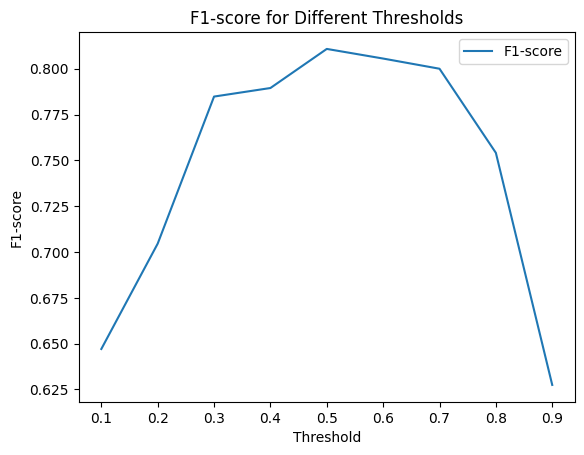

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)

f1_scores = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Threshold: {threshold:.2f}, F1-score: {f1:.4f}")

plt.plot(thresholds, f1_scores, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score for Different Thresholds")
plt.legend()
plt.show()

F1 cao nhất khi threshold là 0.5.

Average(CV) Accuracy: 0.9227
Accuracy on Test: 0.8803
Precision: 0.7500
Recall: 0.8824
F1-score: 0.8108


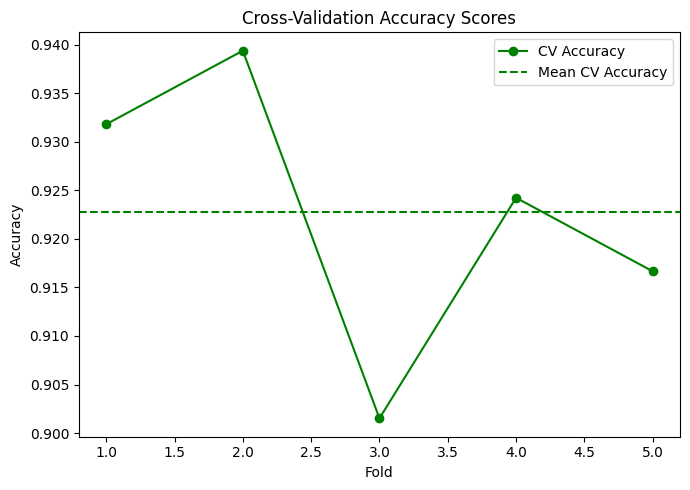

In [ ]:
y_pred = (y_proba >= 0.5).astype(int)
scores_accuracy = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

metrics = {
    "Test Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
}

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

(0.0, 1.0)

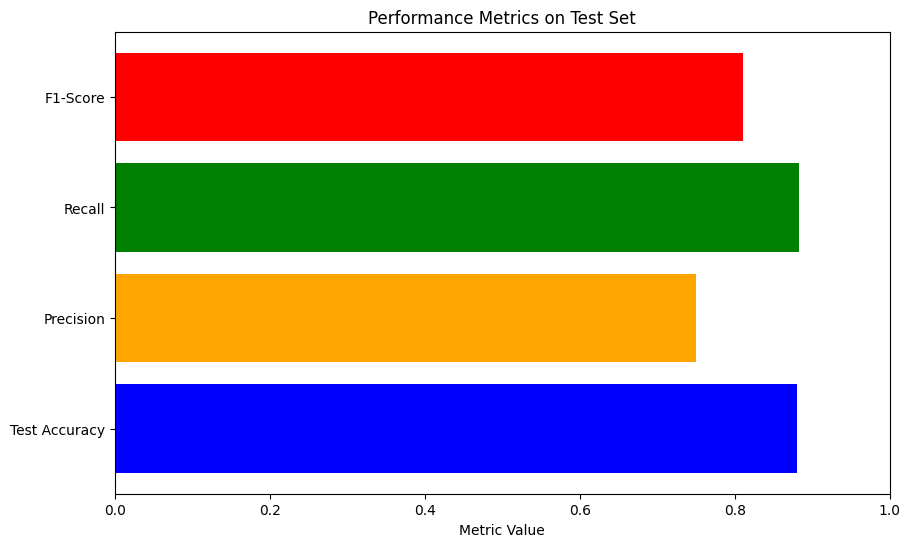

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

ax2.barh(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
ax2.set_title("Performance Metrics on Test Set")
ax2.set_xlabel("Metric Value")
ax2.set_xlim(0, 1)

## Mô hình Logistic

Threshold: 0.10, F1-score: 0.5565
Threshold: 0.20, F1-score: 0.6337
Threshold: 0.30, F1-score: 0.6739
Threshold: 0.40, F1-score: 0.6966
Threshold: 0.50, F1-score: 0.7561
Threshold: 0.60, F1-score: 0.7595
Threshold: 0.70, F1-score: 0.7397
Threshold: 0.80, F1-score: 0.7000
Threshold: 0.90, F1-score: 0.6667


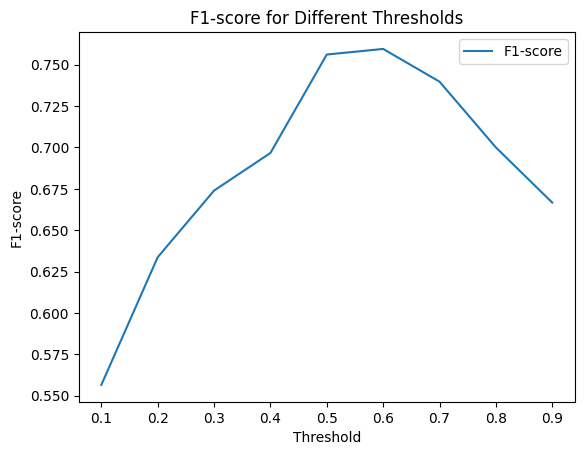

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

y_proba = lr.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)

f1_scores = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Threshold: {threshold:.2f}, F1-score: {f1:.4f}")

plt.plot(thresholds, f1_scores, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score for Different Thresholds")
plt.legend()
plt.show()

F1 cao nhất khi threshold là 0.6.

Average(CV) Accuracy: 0.8561
Accuracy on Test: 0.8376
Precision: 0.6667
Recall: 0.8824
F1-score: 0.7595


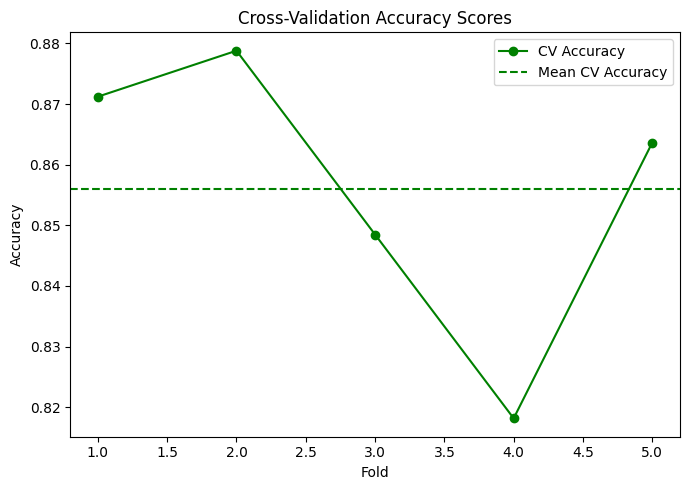

In [ ]:
y_pred = (y_proba >= 0.6).astype(int)
scores_accuracy = cross_val_score(lr, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

metrics = {
    "Test Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
}

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

(0.0, 1.0)

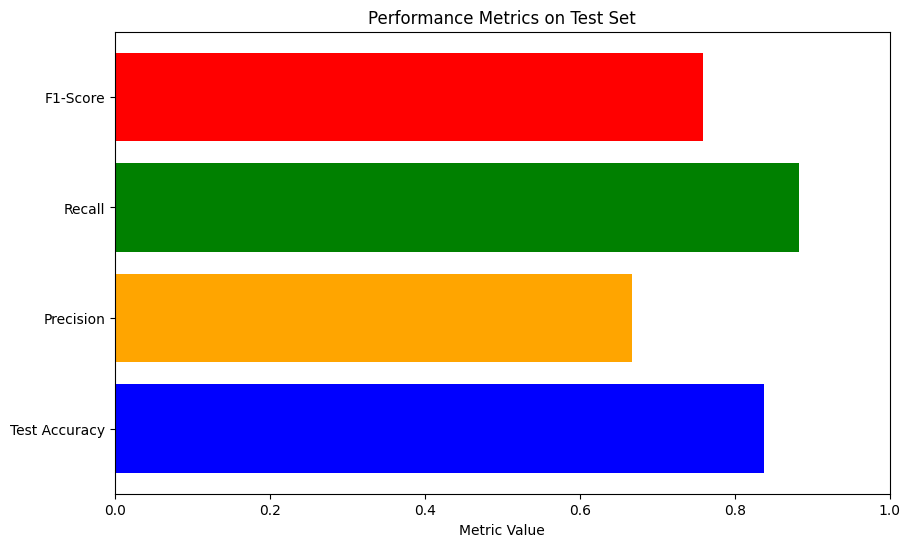

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

ax2.barh(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
ax2.set_title("Performance Metrics on Test Set")
ax2.set_xlabel("Metric Value")
ax2.set_xlim(0, 1)

## Mô hình CatBoost

In [ ]:
!pip install catboost

Threshold: 0.10, F1-score: 0.7209
Threshold: 0.20, F1-score: 0.7949
Threshold: 0.30, F1-score: 0.7838
Threshold: 0.40, F1-score: 0.7945
Threshold: 0.50, F1-score: 0.8169
Threshold: 0.60, F1-score: 0.8286
Threshold: 0.70, F1-score: 0.8235
Threshold: 0.80, F1-score: 0.8125
Threshold: 0.90, F1-score: 0.8197


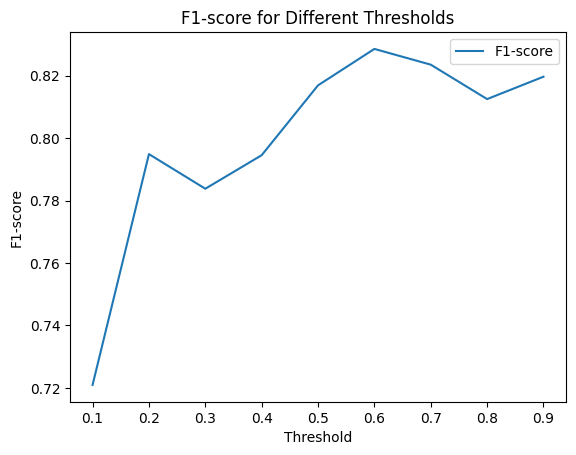

In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(silent=True, random_state=42)
cb.fit(X_train, y_train)

y_proba = cb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)

f1_scores = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Threshold: {threshold:.2f}, F1-score: {f1:.4f}")

plt.plot(thresholds, f1_scores, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score for Different Thresholds")
plt.legend()
plt.show()

Threshold 0.6

Average(CV) Accuracy: 0.9333
Accuracy on Test: 0.8974
Precision: 0.8056
Recall: 0.8529
F1-score: 0.8286


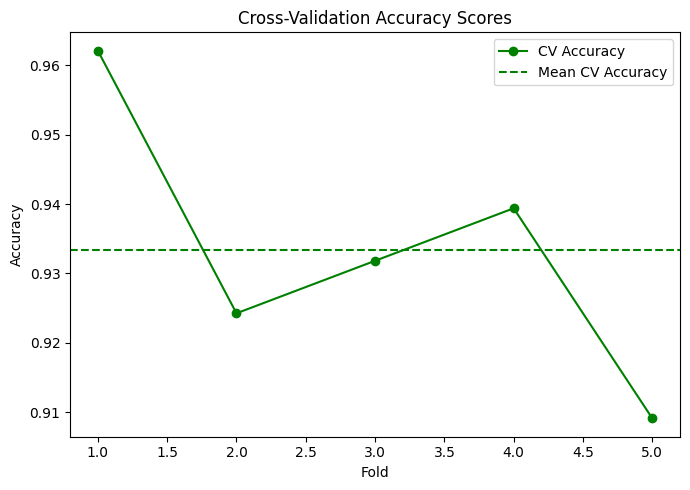

In [ ]:
y_pred = (y_proba >= 0.6).astype(int)
scores_accuracy = cross_val_score(cb, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

metrics = {
    "Test Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
}

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

(0.0, 1.0)

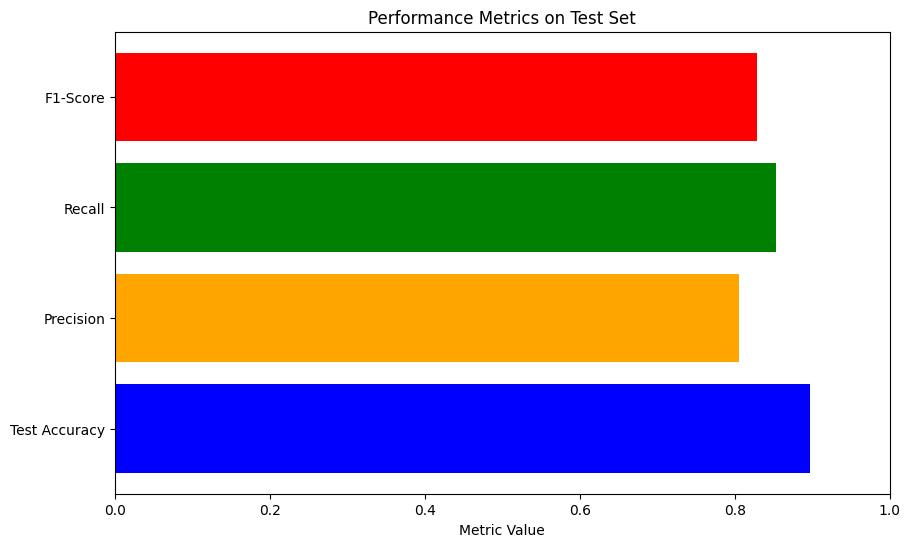

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

ax2.barh(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
ax2.set_title("Performance Metrics on Test Set")
ax2.set_xlabel("Metric Value")
ax2.set_xlim(0, 1)

# Cân nhắc cải thiện


## Trọng lượng lớp, Recall, Precision

Tạo class_weight để ưu tiên class 1 của RandomForest

Điều này có thể sẽ tăng độ chính xác của class 1 (Recall)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight={0:1,1:2})
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

Average(CV) Accuracy: 0.9258
Accuracy on Test: 0.8889
Precision: 0.7692
Recall: 0.8824
F1-score: 0.8219


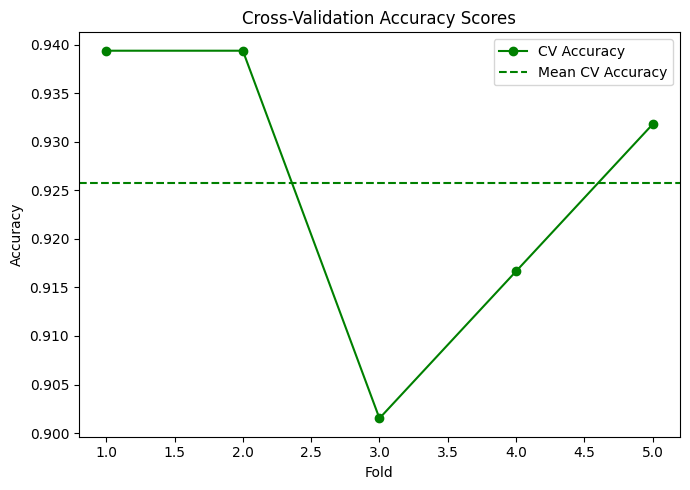

In [ ]:
scores_accuracy = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

(0.0, 1.0)

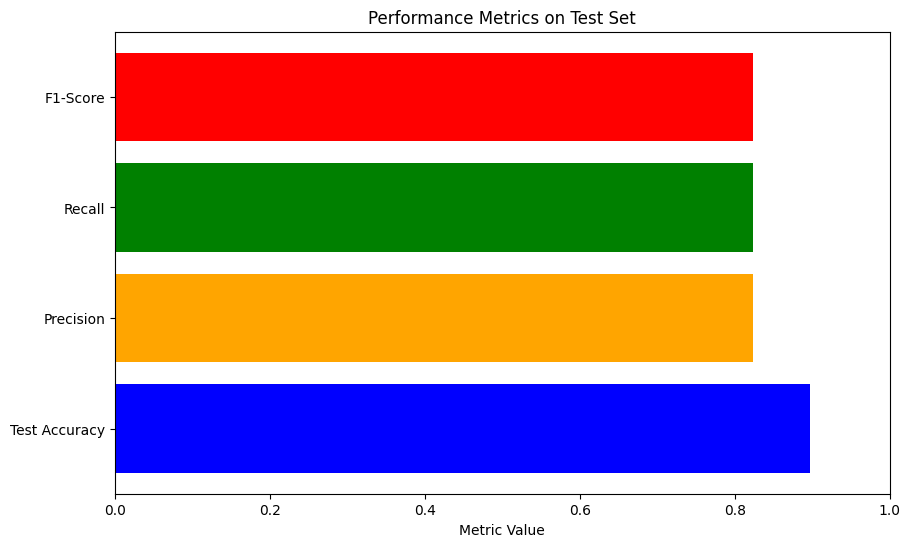

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

ax2.barh(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
ax2.set_title("Performance Metrics on Test Set")
ax2.set_xlabel("Metric Value")
ax2.set_xlim(0, 1)

Không có sự thay đổi nào ở Recall, nhưng bù lại tăng độ Precision, dẫn đến tăng độ chính xác của tập test và F1.

Hiệu suất của mô hình tăng, mặc dù không đáng kể, nhưng cũng là một sự cải thiện tốt.



---



Tạo class_weight để chú trọng class 0 của Logistic.
Đều này có thể tăng Precision của Logistic.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100000, random_state=42, class_weight={0:2,1:1})
lr.fit(X_train, y_train)

y_proba = lr.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.6).astype(int)

Average(CV) Accuracy: 0.8167
Accuracy on Test: 0.8547
Precision: 0.7742
Recall: 0.7059
F1-score: 0.7385


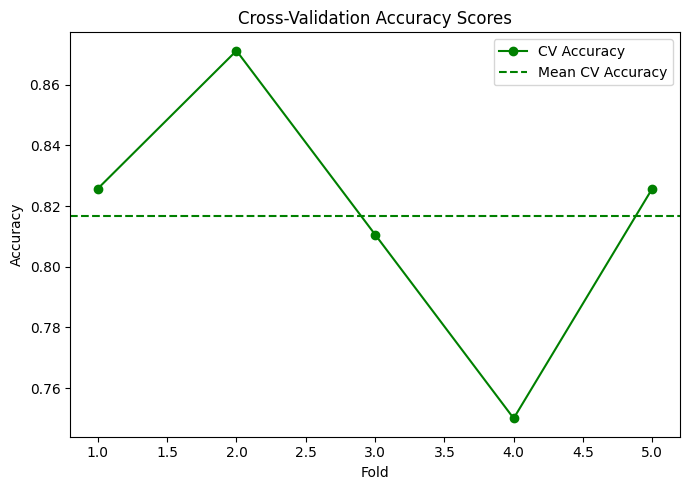

In [ ]:
scores_accuracy = cross_val_score(lr, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

metrics = {
    "Test Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
}

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

Precision và độ chính xác tập test tăng nhưng giảm Recall và F1.

Hiệu suất mô hình cũng giảm, chứng tỏ sự cải thiện này không tốt.

## Đổi cách xử lý dữ liệu ngoại lai

Cách xử lý loại bỏ ngoại lai này sẽ giúp giữ lại các hàng khác không có giá trị ngoại lai trong thuộc tính đó, giảm thiểu mất dữ liệu. Cụ thể thì đấy là loại bỏ giá trị ngoại lai theo từng thuộc tính. Nhưng bù lại nếu một hàng có nhiều ngoại lai trên các thuộc tính khác nhau, các giá trị ngoại lai này vẫn có thể tồn tại trong dữ liệu sau khi lọc.

In [ ]:
def remove_outliers(train,test):
    attributes = train.columns.to_list()
    outlierIndexes_train = set()
    outlierIndexes_test = set()
    for attribute in attributes:
        Q1 = train[attribute].quantile(0.25)
        Q3 = train[attribute].quantile(0.75)
        IQR = Q3 - Q1
        Min = Q1 - 1.5 * IQR
        Max = Q3 + 1.5 * IQR
        outlierIndexesOfAtrribute_train = train[(train[attribute] < Min) | (train[attribute] > Max)].index.to_list()
        outlierIndexesOfAtrribute_test = test[(test[attribute] < Min) | (test[attribute] > Max)].index.to_list()
        outlierIndexes_train = outlierIndexes_train.union(set(outlierIndexesOfAtrribute_train))
        outlierIndexes_test = outlierIndexes_test.union(set(outlierIndexesOfAtrribute_test))
    print("-------Loại bỏ giá trị ngoại lai hoàn tất!")
    return train.drop(list(outlierIndexes_train)), test.drop(list(outlierIndexes_test))
train,test = remove_outliers(train,test)

-------Loại bỏ giá trị ngoại lai hoàn tất!


In [ ]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,70,26,105,30.0,0.304,21,0
346,1,139,46,19,83,28.7,0.654,22,0
340,1,130,70,13,105,25.9,0.472,22,0
535,4,132,74,32,167,32.9,0.302,23,1
306,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
700,2,122,76,27,200,35.9,0.483,26,0
71,5,139,64,35,140,28.6,0.411,26,0
270,10,101,86,37,167,45.6,1.136,38,1
435,0,141,74,32,167,42.4,0.205,29,1


In [ ]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,105,35.7,0.148,21,0
624,2,108,64,26,105,30.8,0.158,21,0
690,8,107,80,26,105,24.6,0.856,34,0
473,7,136,90,26,105,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
133,8,84,74,31,105,38.3,0.457,39,0
725,4,112,78,40,105,39.4,0.236,38,0
355,9,165,88,32,167,30.4,0.302,49,1
344,8,95,72,26,105,36.8,0.485,57,0


### RandomForest

Threshold: 0.10, F1-score: 0.6535
Threshold: 0.20, F1-score: 0.7273
Threshold: 0.30, F1-score: 0.7561
Threshold: 0.40, F1-score: 0.7792
Threshold: 0.50, F1-score: 0.8108
Threshold: 0.60, F1-score: 0.8406
Threshold: 0.70, F1-score: 0.8125
Threshold: 0.80, F1-score: 0.7797
Threshold: 0.90, F1-score: 0.7037


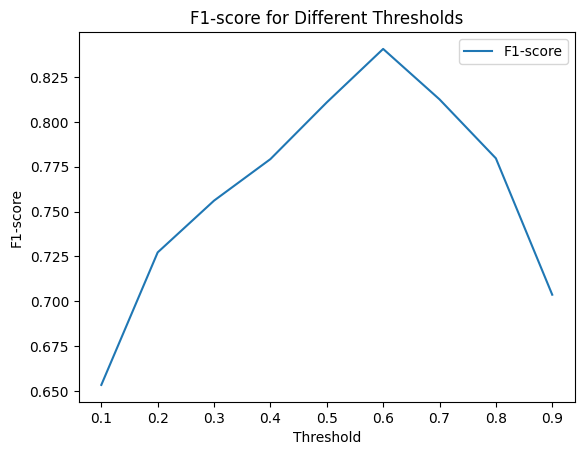

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)

f1_scores = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Threshold: {threshold:.2f}, F1-score: {f1:.4f}")

plt.plot(thresholds, f1_scores, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score for Different Thresholds")
plt.legend()
plt.show()

Average(CV) Accuracy: 0.9197
Accuracy on Test: 0.9060
Precision: 0.8286
Recall: 0.8529
F1-score: 0.8406


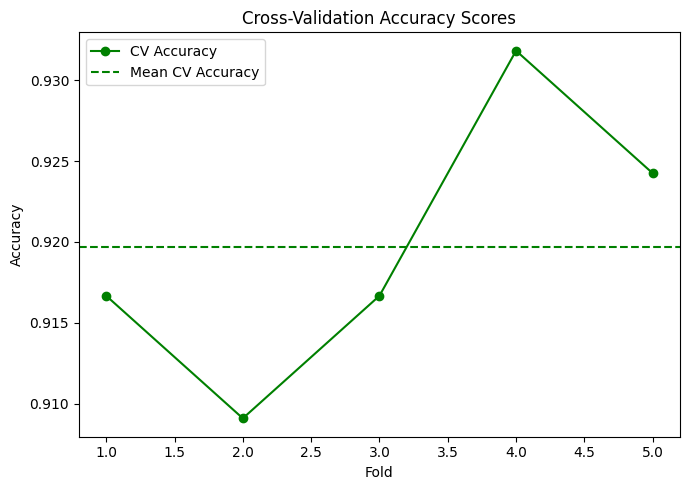

In [ ]:
y_pred = (y_proba >= 0.6).astype(int)
scores_accuracy = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

metrics = {
    "Test Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
}

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

(0.0, 1.0)

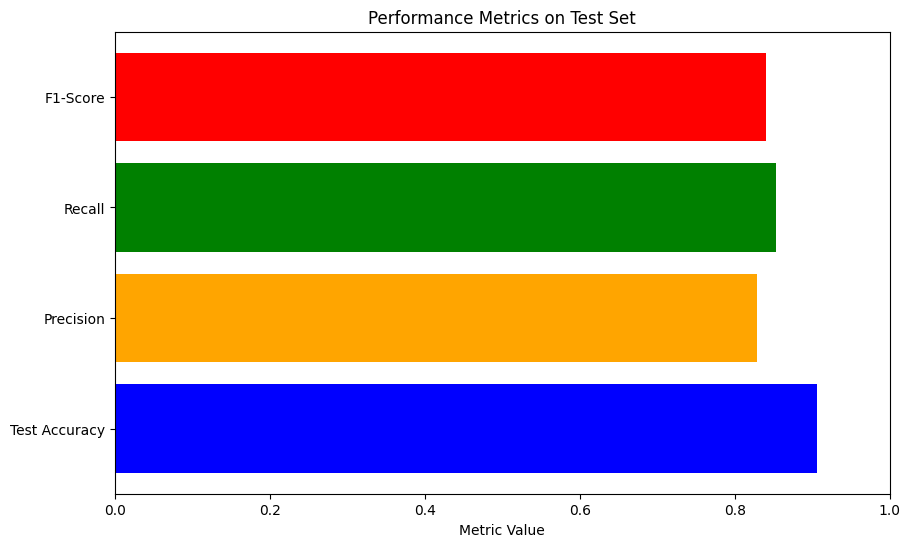

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

ax2.barh(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
ax2.set_title("Performance Metrics on Test Set")
ax2.set_xlabel("Metric Value")
ax2.set_xlim(0, 1)

### Logistic

Threshold: 0.10, F1-score: 0.5818
Threshold: 0.20, F1-score: 0.6465
Threshold: 0.30, F1-score: 0.6813
Threshold: 0.40, F1-score: 0.7126
Threshold: 0.50, F1-score: 0.7561
Threshold: 0.60, F1-score: 0.7273
Threshold: 0.70, F1-score: 0.7246
Threshold: 0.80, F1-score: 0.6780
Threshold: 0.90, F1-score: 0.6909


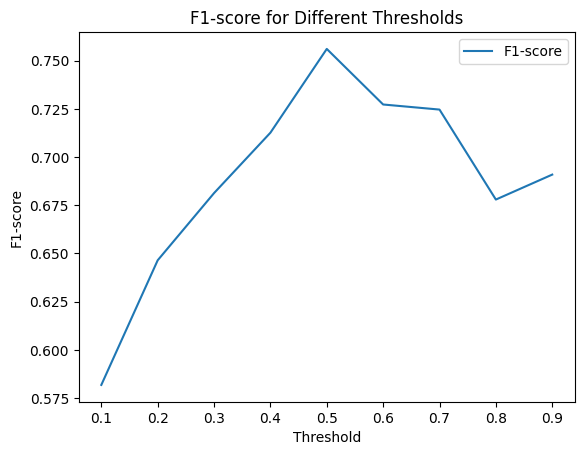

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

y_proba = lr.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)

f1_scores = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Threshold: {threshold:.2f}, F1-score: {f1:.4f}")

plt.plot(thresholds, f1_scores, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score for Different Thresholds")
plt.legend()
plt.show()

Average(CV) Accuracy: 0.8621
Accuracy on Test: 0.8291
Precision: 0.6458
Recall: 0.9118
F1-score: 0.7561


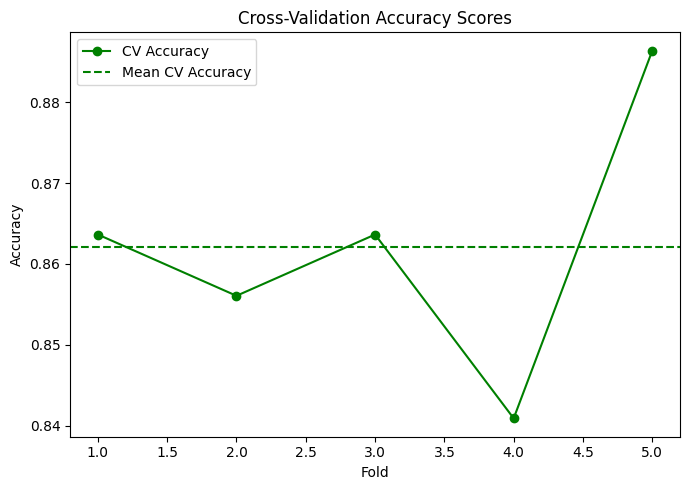

In [ ]:
y_pred = (y_proba >= 0.5).astype(int)
scores_accuracy = cross_val_score(lr, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

metrics = {
    "Test Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
}

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

(0.0, 1.0)

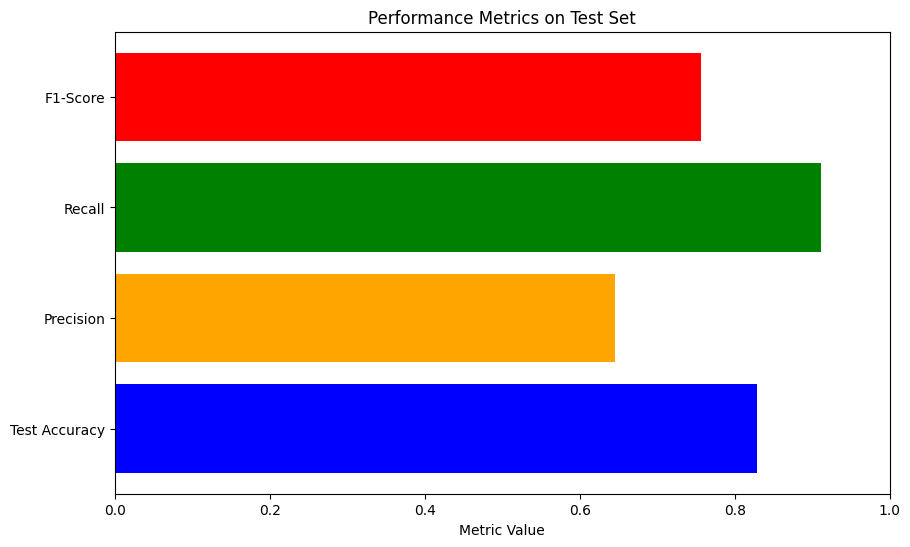

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

ax2.barh(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
ax2.set_title("Performance Metrics on Test Set")
ax2.set_xlabel("Metric Value")
ax2.set_xlim(0, 1)

### CatBoost

Threshold: 0.10, F1-score: 0.7294
Threshold: 0.20, F1-score: 0.7407
Threshold: 0.30, F1-score: 0.7792
Threshold: 0.40, F1-score: 0.7945
Threshold: 0.50, F1-score: 0.8169
Threshold: 0.60, F1-score: 0.8169
Threshold: 0.70, F1-score: 0.8529
Threshold: 0.80, F1-score: 0.8308
Threshold: 0.90, F1-score: 0.8333


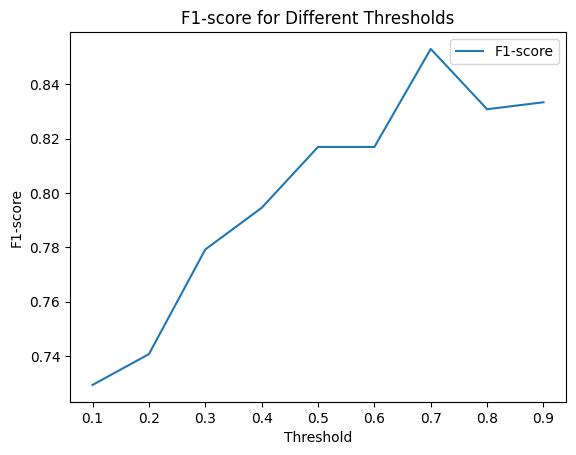

In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(silent=True, random_state=42)
cb.fit(X_train, y_train)

y_proba = cb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)

f1_scores = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Threshold: {threshold:.2f}, F1-score: {f1:.4f}")

plt.plot(thresholds, f1_scores, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score for Different Thresholds")
plt.legend()
plt.show()

Average(CV) Accuracy: 0.9318
Accuracy on Test: 0.9145
Precision: 0.8529
Recall: 0.8529
F1-score: 0.8529


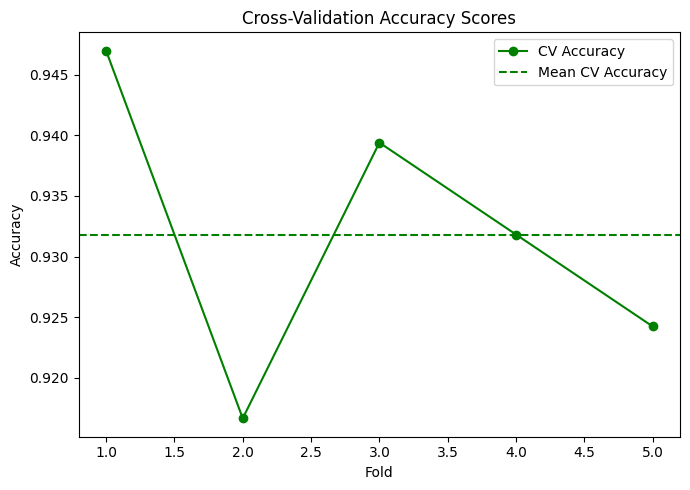

In [ ]:
y_pred = (y_proba >= 0.7).astype(int)
scores_accuracy = cross_val_score(cb, X_train, y_train, cv=5, n_jobs=-1, scoring= "accuracy")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print(f'Average(CV) Accuracy: {scores_accuracy.mean():.4f}')
print(f'Accuracy on Test: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

metrics = {
    "Test Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
}

plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), scores_accuracy, marker='o', color='green', label="CV Accuracy")
plt.axhline(np.mean(scores_accuracy), color='green', linestyle='--', label="Mean CV Accuracy")
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.show()

(0.0, 1.0)

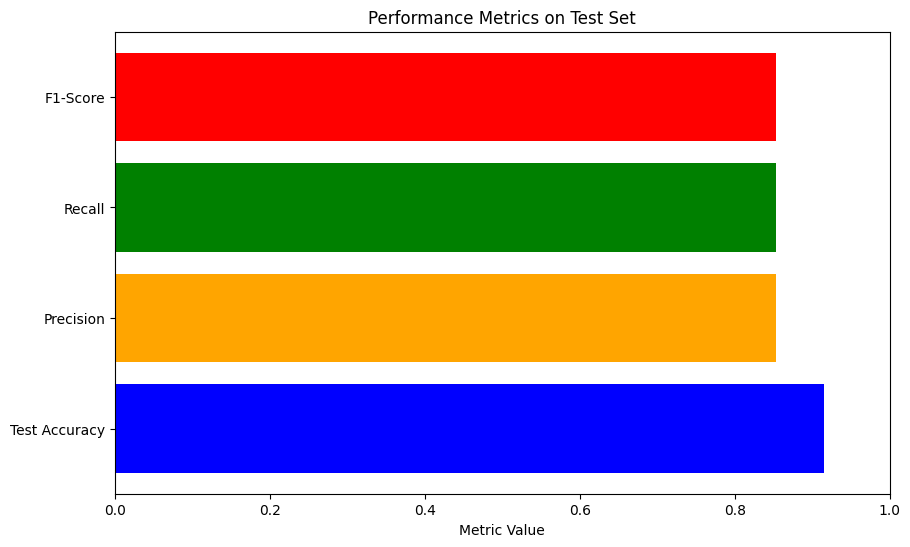

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

ax2.barh(metric_names, metric_values, color=['blue', 'orange', 'green', 'red'])
ax2.set_title("Performance Metrics on Test Set")
ax2.set_xlabel("Metric Value")
ax2.set_xlim(0, 1)

Nhận xét: Tất cả mô hình đều tăng hiệu suất, tăng độ chính xác của tập test. Đây là một cải thiện rất tốt, đặc biệt là CatBoost và RandomForest.

# Kết luận:



*   Sự cải thiện thông qua cách xử lý dữ liệu ngoại lai theo đặc trưng gia tăng đáng kể hiệu suất và độ chính xác của mô hình trong việc phân class 1 và class 0.

*   Trong 3 mô hình thì có mô hình RandomForest, CatBoost có hiệu suất rất tốt.

# Lưu mô hình

Lưu mô hình có hiệu suất tốt nhất, đó là RandomForest và CatBoost

In [ ]:
joblib.dump(rf, 'RandomForest')
joblib.dump(cb, 'CatBoost')
print("Lưu mô hình thành công!")

Lưu mô hình thành công!
